In this notebook we will use the nn class **Sequential** to model a CNN

We will use the single target network

# Import

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import KFold

from tqdm import tqdm

import load_script
from params import *
from custom_layers import *
from training import *
from networks import *

from utilities import *
from parse_dataset import *

In [3]:
%load_ext autoreload
%autoreload 2

# Loading the dataset

In [4]:
folder=Dataset(base_directory='/home/stefano/',dataset='eeg')

Reading data from /home/stefano/EEG//
Reading data from /home/stefano/EEG//stored//
Reading data from /home/stefano/EEG//__pycache__//
Reading data from /home/stefano/EEG//data//
Reading data from /home/stefano/EEG//stefano//
Reading data from /home/stefano/EEG//stefano//__pycache__//
Reading data from /home/stefano/EEG//stefano//notebook//


In [5]:
# train_dataset,train_target=load_script.load_dataset_1000hz(train=True)

In [61]:
# test_dataset,test_target=load_script.load_dataset_1000hz(train=False)

In [62]:
train_dataset,train_target=load_script.load_dataset(train=True)

In [63]:
test_dataset,test_target=load_script.load_dataset(train=False)

# Shuffling training testing

In [51]:
dataset=torch.cat((train_dataset.data,test_dataset.data),0)
target=torch.cat((train_target.data,test_target.data),0)

In [52]:
permutations=torch.randperm(dataset.shape[0])

In [53]:
dataset=dataset[permutations]
target=target[permutations]

In [54]:
train_dataset=Variable(dataset[:316])
train_target=Variable(target[:316])
test_dataset=Variable(dataset[316:])
test_target=Variable(target[316:])

# Normalization

In [64]:
train_dataset.shape

torch.Size([316, 28, 50])

In [65]:
test_dataset.shape

torch.Size([100, 28, 50])

In [66]:
mean=train_dataset.mean(0).mean(1).view(1,28,1)
std=train_dataset.std(2).mean(0).view(1,28,1)

In [67]:
train_dataset=(train_dataset-mean)/std
test_dataset=(test_dataset-mean)/std

# Defining the network

### Simple Network

# Training

In [68]:
cv.result._experiments

  3%|▎         | 8/300 [00:00<00:03, 74.28it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:05<00:00, 57.43it/s]


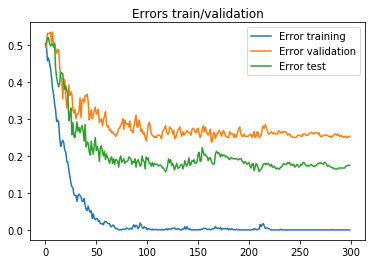

Performance train: 4.2194092827e-05
Performance validation: 0.257257383966
Performance test: 0.173666666667


  3%|▎         | 8/300 [00:00<00:03, 73.33it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:05<00:00, 58.33it/s]


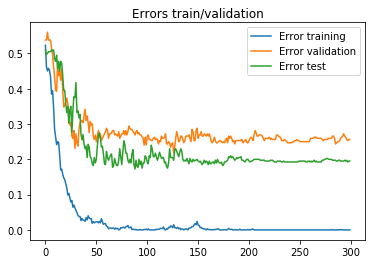

Performance train: 4.2194092827e-05
Performance validation: 0.256033755274
Performance test: 0.194966666667


  3%|▎         | 8/300 [00:00<00:03, 73.19it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:05<00:00, 57.54it/s]


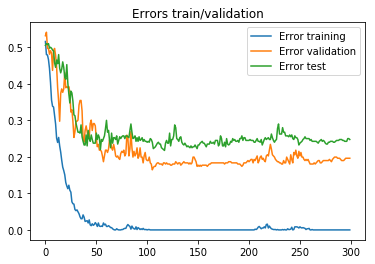

Performance train: 0.00143459915612
Performance validation: 0.192025316456
Performance test: 0.2486


  2%|▏         | 7/300 [00:00<00:04, 69.74it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:06<00:00, 25.30it/s]


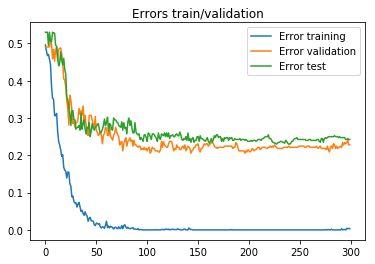

Performance train: 0.000323488045007
Performance validation: 0.222700421941
Performance test: 0.241833333333


  1%|▏         | 4/300 [00:00<00:07, 37.75it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:06<00:00, 53.52it/s]


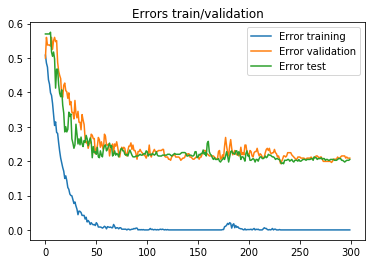

Performance train: 7.0323488045e-05
Performance validation: 0.209915611814
Performance test: 0.203833333333


  3%|▎         | 8/300 [00:00<00:04, 72.62it/s]

FourCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (9): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (10): ReLU()
    (11): Dropout(p=0)
    (12): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (13): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (14): ReLU()
    (15): Dropout(p=0)
    (16): Flatten(
    )
    (17): Linear(in_features=1176, out_features=200, bias=True)
    (18): ReLU()
    (19): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


 32%|███▏      | 96/300 [00:02<00:05, 36.86it/s]

In [ ]:
results=[]
for i in range(30):
    train_dataset,train_target=load_script.load_dataset(train=True)
    test_dataset,test_target=load_script.load_dataset(train=False)
    
    dataset=torch.cat((train_dataset.data,test_dataset.data),0)
    target=torch.cat((train_target.data,test_target.data),0)
    permutations=torch.randperm(dataset.shape[0])
    dataset=dataset[permutations]
    target=target[permutations]
    train_dataset=Variable(dataset[:316])
    train_target=Variable(target[:316])
    test_dataset=Variable(dataset[316:])
    test_target=Variable(target[316:])
    mean=train_dataset.mean(0).mean(1).view(1,28,1)
    std=train_dataset.std(2).mean(0).view(1,28,1)
    train_dataset=(train_dataset-mean)/std
    test_dataset=(test_dataset-mean)/std
    
    cv=CrossValidation(k=4,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target,cuda=True)

    net_type=FourCNNLayers
    optimizer_type=optim.Adam
    criterion_type=nn.CrossEntropyLoss
    network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[3,3,3],
                                 linear_filters=[200,2],
                                 dropout_rate=0,batch_norm=True,conv1D=True)
    optimizer_params=OptimizerParams()
    train_params=TrainParams(max_epoch=300,mini_batch_size=79)


    params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
                  optimizer_params=optimizer_params,train_params=train_params,cuda=True)

    cv(params,repetitions=1,cross_validation=True,repetitions_test=4)
    results.append(cv.result)

In [ ]:
params.network

In [ ]:
save=True
if save:
    file_name=folder.stored+'four_layers'
    write_pickle(results,file_name)

In [ ]:
cv=CrossValidation(k=2,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target)

net_type=ThreeLayers2D
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[(3,1),(5,3),(3,3)],
                             linear_filters=[200,2],
                             dropout_rate=0,batch_norm=False,conv1D=False)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100,mini_batch_size=79)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

cv(params)

In [ ]:
net_type=ThreeLayers
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(linear_filters=[200,2],dropout_rate=0)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

train=Train(train_dataset=train_dataset,test_dataset=test_dataset,
            train_target=train_target,test_target=test_target)
train(params)